# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


### BUSINESS UNDERSTANDING
Real estate investment is a significant financial decision that requires careful analysis and strategic planning. In this project, we embark on a comprehensive exploration of real estate investment opportunities in four diverse and dynamic cities: Chicago, New York, Houston, and San Francisco. Our aim is to provide valuable insights and data-driven guidance to potential real estate investors who are considering property investments in these cities over the next decade.

The project involves a multifaceted approach, encompassing data collection, preprocessing, time series analysis, and forecasting. We begin by sourcing and preparing real-world data, focusing on key metrics such as Return on Investment (ROI), property values, and rental income. Using advanced statistical techniques, including the ARIMA model, we analyze historical ROI data to uncover trends, patterns, and potential risks associated with real estate investments in each city.

### PROBLEM STATEMENT
Real estate investment is a complex and potentially lucrative endeavor, with numerous factors influencing the decision-making process. Investors seeking to allocate their capital in the real estate markets of major cities face several critical challenges and uncertainties. We have been therefore appointed by an investor as a Data scientist to give them insights to their overarching problem addressed by this project can be defined as follows:

Investor Uncertainty and Risk Mitigation: Investors are often confronted with uncertainty about where and when to invest their resources in real estate properties. Decisions regarding property acquisition and management must navigate a dynamic landscape of market conditions, economic trends, regulatory changes, and shifting investor goals. Moreover, the longevity of real estate investments, often spanning years or even decades, necessitates a forward-looking approach that mitigates risks while maximizing returns.
There are other subquestions to be addressed which include:

ROI Assessment: Investors need reliable methods to assess the historical performance of potential real estate investments, particularly Return on Investment (ROI). Understanding ROI trends is crucial for predicting future returns and making informed investment choices.

Risk Identification: Investors must identify and evaluate the risks associated with specific cities or regions. Factors such as economic stability, market volatility, regulatory changes, and unforeseen events can significantly impact the return on investment.

Long-Term Planning: Investors require insights into long-term ROI trends to make strategic investment decisions that align with their financial goals, whether they prioritize capital appreciation, rental income, or a balanced approach.

Diversification Strategy: Determining the optimal allocation of resources across multiple cities is a complex task. Investors seek guidance on how to diversify their portfolios to manage risk effectively while optimizing returns.

Market Conditions: An understanding of current and projected market conditions in chosen cities is crucial. Factors like property values, rental yields, demand, and supply directly influence investment decisions. 

### BUSINESS OBJECTIVES
The objective of this project is to address the problem of investor uncertainty and risk mitigation in real estate investments by providing data-driven insights, forecasting, and analysis. By doing so, we aim to assist the investors in making informed decisions regarding property investments in the four selected cities over the next decade.

### Key Deliverables:

Historical ROI analysis for each city.

Identification and assessment of potential risks associated with real estate investments.

Long-term ROI forecasts to aid strategic planning.

Recommendations on diversification strategies.

Insights into current market conditions in Chicago, New York, Houston, and San Francisco

### Success Criteria:

The success of this project will be measured by its ability to provide investors with actionable information, enabling them to make well-informed real estate investment decisions that align with their financial objectives, risk tolerance, and time horizons. Success will also be gauged by the project's capacity to enhance investors' understanding of the selected cities' real estate markets and how they evolve over time.

### 1. LOADING THE DATASET

In [1]:
import pandas as pd
df = pd.read_csv("zillow_data.csv")
df.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [3]:
# Checking the column names
column_names = df.columns

# Print the column names
print(column_names)

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)


In [32]:
#Renaming the 'RegionName' to Zipcode
df.rename(columns={'RegionName':'ZipCode'},inplace=True)
print(df)

       RegionID  ZipCode                 City State              Metro  \
0         84654    60657              Chicago    IL            Chicago   
1         90668    75070             McKinney    TX  Dallas-Fort Worth   
2         91982    77494                 Katy    TX            Houston   
3         84616    60614              Chicago    IL            Chicago   
4         93144    79936              El Paso    TX            El Paso   
...         ...      ...                  ...   ...                ...   
14718     58333     1338             Ashfield    MA    Greenfield Town   
14719     59107     3293            Woodstock    NH          Claremont   
14720     75672    40404                Berea    KY           Richmond   
14721     93733    81225  Mount Crested Butte    CO                NaN   
14722     95851    89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0           Cook         1  334200.0 

In [5]:
#Filtering by cities
cities = ['New York', 'Los Angeles','Chicago','Houston'] #list of city names to filter for
df_filtered= df[df['City'].isin(cities)]  ##filtering the dataframe based on list of cities and storing in new data frame
df_filtered= df[df['City'].isin(cities)]
print('Number of rows in original data:', len(df))
print('\n')
print('Number of rows after filtering: ',len(df_filtered))
print(df_filtered)

Number of rows in original data: 14723


Number of rows after filtering:  338
       RegionID  RegionName      City State     Metro CountyName  SizeRank  \
0         84654       60657   Chicago    IL   Chicago       Cook         1   
3         84616       60614   Chicago    IL   Chicago       Cook         4   
5         91733       77084   Houston    TX   Houston     Harris         6   
6         61807       10467  New York    NY  New York      Bronx         7   
7         84640       60640   Chicago    IL   Chicago       Cook         8   
...         ...         ...       ...   ...       ...        ...       ...   
8897      75034       38851   Houston    MS       NaN  Chickasaw      8898   
9911      62075       11363  New York    NY  New York     Queens      9912   
11037     61804       10464  New York    NY  New York      Bronx     11038   
11934     91699       77050   Houston    TX   Houston     Harris     11935   
14206     66105       19954   Houston    DE     Dover       Kent

# Step 2: Data Preprocessing

In [6]:
#getting information on our new dataframe
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 0 to 14206
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 720.9+ KB


In [7]:
#description of the dataframe
df_filtered.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,338.000000,338.000000,338.000000,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02,...,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02
mean,82887.417160,56327.633136,2802.242604,1.988656e+05,1.991350e+05,1.993944e+05,1.996402e+05,1.998972e+05,2.001817e+05,2.005288e+05,...,7.862009e+05,7.903089e+05,7.945112e+05,7.982728e+05,8.007343e+05,8.035183e+05,8.080639e+05,8.122169e+05,8.155467e+05,8.176426e+05
std,22726.482583,33770.208796,2600.288201,2.289394e+05,2.304341e+05,2.318304e+05,2.332086e+05,2.347023e+05,2.364277e+05,2.383954e+05,...,1.436407e+06,1.430616e+06,1.424296e+06,1.420806e+06,1.412441e+06,1.406099e+06,1.410970e+06,1.412795e+06,1.396420e+06,1.376770e+06
min,61625.000000,10011.000000,1.000000,3.430000e+04,3.450000e+04,3.460000e+04,3.480000e+04,3.500000e+04,3.520000e+04,3.540000e+04,...,7.420000e+04,7.430000e+04,7.490000e+04,7.530000e+04,7.610000e+04,7.440000e+04,7.200000e+04,7.200000e+04,7.380000e+04,7.400000e+04
25%,62087.250000,11375.500000,617.500000,1.241000e+05,1.241000e+05,1.241000e+05,1.241500e+05,1.244000e+05,1.249500e+05,1.250000e+05,...,3.209250e+05,3.215500e+05,3.240250e+05,3.266750e+05,3.279750e+05,3.323000e+05,3.352500e+05,3.364750e+05,3.379750e+05,3.361000e+05
50%,91667.500000,77017.500000,2051.000000,1.606000e+05,1.604000e+05,1.608000e+05,1.605000e+05,1.604000e+05,1.605000e+05,1.605000e+05,...,5.148000e+05,5.208500e+05,5.268000e+05,5.308500e+05,5.336000e+05,5.349500e+05,5.368500e+05,5.393500e+05,5.450000e+05,5.498500e+05
75%,95995.750000,90013.750000,4493.000000,2.158000e+05,2.159000e+05,2.162000e+05,2.166000e+05,2.168500e+05,2.170000e+05,2.172000e+05,...,8.264000e+05,8.324000e+05,8.389000e+05,8.455250e+05,8.488500e+05,8.516750e+05,8.522250e+05,8.547750e+05,8.605500e+05,8.755000e+05
max,399713.000000,91607.000000,14207.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [8]:
#checking for missing values
df_filtered.isnull().sum()


RegionID      0
RegionName    0
City          0
State         0
Metro         1
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

In [9]:
#dropping the missing values
cleaned_df_filtered=df.dropna()
print(cleaned_df_filtered)

       RegionID  RegionName          City State              Metro CountyName  \
0         84654       60657       Chicago    IL            Chicago       Cook   
1         90668       75070      McKinney    TX  Dallas-Fort Worth     Collin   
2         91982       77494          Katy    TX            Houston     Harris   
3         84616       60614       Chicago    IL            Chicago       Cook   
4         93144       79936       El Paso    TX            El Paso    El Paso   
...         ...         ...           ...   ...                ...        ...   
14716     99032       97028  Rhododendron    OR           Portland  Clackamas   
14718     58333        1338      Ashfield    MA    Greenfield Town   Franklin   
14719     59107        3293     Woodstock    NH          Claremont    Grafton   
14720     75672       40404         Berea    KY           Richmond    Madison   
14722     95851       89155      Mesquite    NV          Las Vegas      Clark   

       SizeRank   1996-04  

In [10]:
#checking for duplicated values
cleaned_df_filtered.duplicated().sum()

0

In [11]:
#defining the get_datetimes function
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [12]:
#Calculating the return of investment column and adding it to the cleaned df
cleaned_df_filtered['ROI'] = ((cleaned_df_filtered['2018-04']-cleaned_df_filtered['1996-04'] / cleaned_df_filtered['1996-04']))
cleaned_df_filtered.head()

C:\Users\User-ADMIN\AppData\Local\Temp\ipykernel_7360\2576810679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_filtered['ROI'] = ((cleaned_df_filtered['2018-04']-cleaned_df_filtered['1996-04'] / cleaned_df_filtered['1996-04']))


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,1030599.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,321799.0
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,329899.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1306999.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,121499.0


<Axes: xlabel='RegionName'>

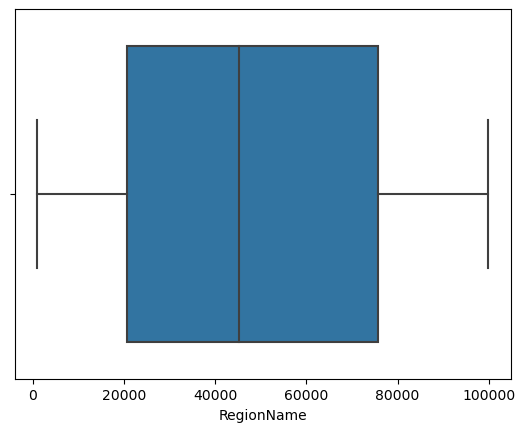

In [18]:
#Checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to visualize outliers 
sns.boxplot(x=cleaned_df_filtered['RegionName'])




<Axes: xlabel='SizeRank'>

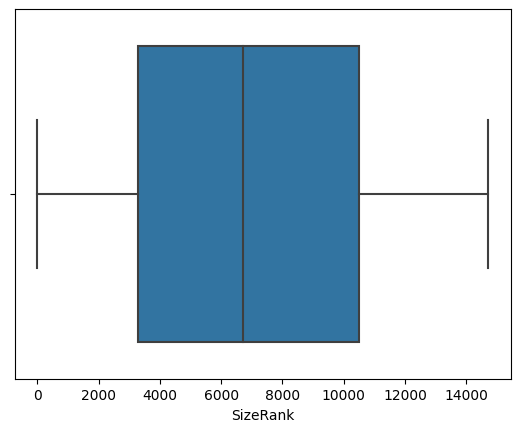

In [44]:
sns.boxplot(x=cleaned_df_filtered['SizeRank'])

<Axes: xlabel='ROI'>

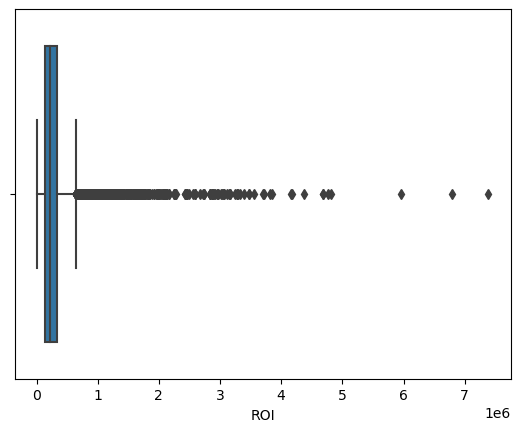

In [14]:
sns.boxplot(x=cleaned_df_filtered['ROI'])

In [15]:
cleaned_df_filtered["ROI"]

0        1030599.0
1         321799.0
2         329899.0
3        1306999.0
4         121499.0
           ...    
14716     349299.0
14718     209299.0
14719     225799.0
14720     133399.0
14722     357199.0
Name: ROI, Length: 12895, dtype: float64

In [19]:
import numpy as np
Q1, Q3= np.percentile(cleaned_df_filtered["ROI"], [25 ,75])
IQR = Q3 - Q1
lower_bound  = int((Q1 - 1.5 * IQR) *10) / 10
upper_bound  = int((Q3 + 1.5 * IQR) *10) / 10
print ("lower bound is {},upper bound is{}". format(lower_bound,upper_bound ))
cleaned_df_filtered = cleaned_df_filtered[(cleaned_df_filtered["ROI"] >= lower_bound) & (cleaned_df_filtered["ROI"] <= upper_bound)]
print(cleaned_df_filtered)

lower bound is -158801.0,upper bound is642799.0
       RegionID  RegionName          City State              Metro CountyName  \
1         90668       75070      McKinney    TX  Dallas-Fort Worth     Collin   
2         91982       77494          Katy    TX            Houston     Harris   
4         93144       79936       El Paso    TX            El Paso    El Paso   
5         91733       77084       Houston    TX            Houston     Harris   
6         61807       10467      New York    NY           New York      Bronx   
...         ...         ...           ...   ...                ...        ...   
14716     99032       97028  Rhododendron    OR           Portland  Clackamas   
14718     58333        1338      Ashfield    MA    Greenfield Town   Franklin   
14719     59107        3293     Woodstock    NH          Claremont    Grafton   
14720     75672       40404         Berea    KY           Richmond    Madison   
14722     95851       89155      Mesquite    NV          Las 

# Step 3: EDA and Visualization

In [20]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

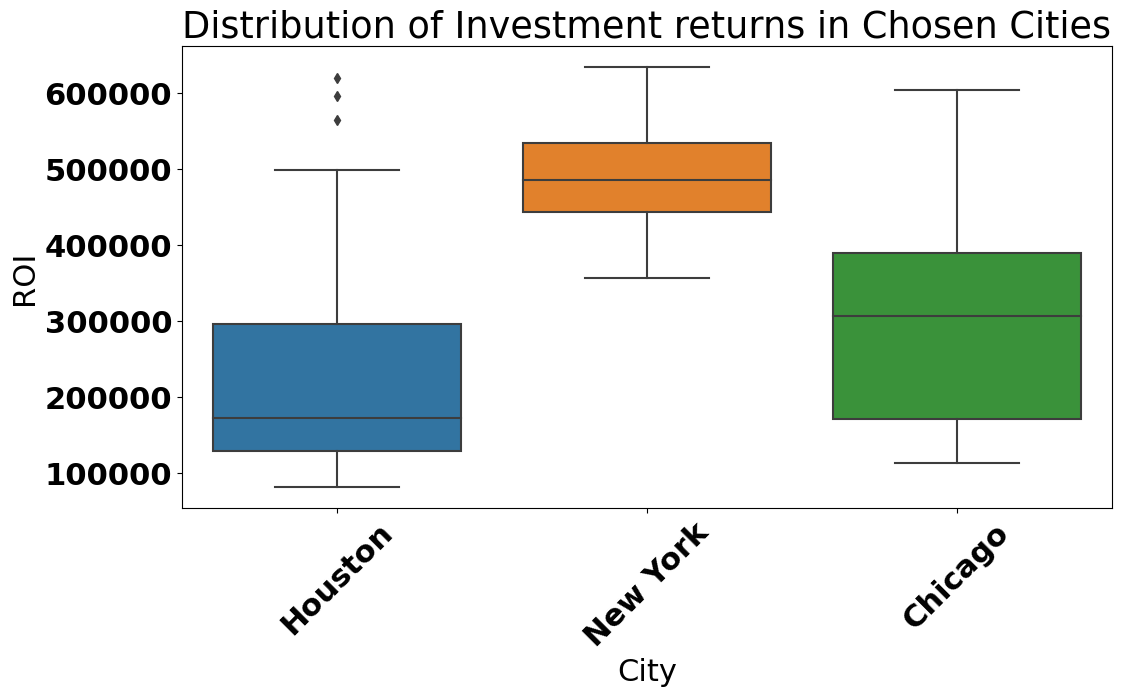

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for the chosen cities
chosen_cities = ['Chicago', 'New York', 'Houston', 'San Francisco']
filtered_df = cleaned_df_filtered[cleaned_df_filtered['City'].isin(chosen_cities)]

# Create a box plot to compare investment returns among the cities
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='City', y='ROI')
plt.title('Distribution of Investment returns in Chosen Cities')
plt.xlabel('City')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.show()


# Step 4: Reshape from Wide to Long Format

In [24]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [25]:
melt_df= melt_data(df)
#melt_df

C:\Users\User-ADMIN\AppData\Local\Temp\ipykernel_7360\1276467365.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)


In [26]:
melt_df.columns

Index(['value'], dtype='object')

In [27]:

# Assuming 'Time' is the name of the column you want to change to 'Date'
melt_df.rename(columns={'Time': 'Date'}, inplace=True)

print(melt_df)


                    value
time                     
1996-04-01  118299.123063
1996-05-01  118419.044139
1996-06-01  118537.423268
1996-07-01  118653.069278
1996-08-01  118780.254312
...                   ...
2017-12-01  281095.320247
2018-01-01  282657.060382
2018-02-01  284368.688447
2018-03-01  286511.376757
2018-04-01  288039.944305

[265 rows x 1 columns]


# Step 5: ARIMA Modeling

In [30]:

# Assuming you have a 'time' column and an 'ROI' column
time_column = 'Time'
roi_column = 'ROI'

# Filter the dataset for the chosen cities
chosen_cities = ['Chicago', 'New York', 'Houston', 'San Francisco']
filtered_df = cleaned_df_filtered[(cleaned_df_filtered['City'].isin(chosen_cities)) & (cleaned_df_filtered[roi_column].notna())]

#setting the time column as the index
melt_df.set_index('time', inplace=True)


KeyError: "None of ['time'] are in the columns"

In [36]:
#checking for stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(filtered_df[roi_column])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -5.0999270314329035
p-value: 1.4023732109624444e-05


In [33]:
#Diffrencing if because my p-value is greater than 0.05
if result[1] > 0.05:
    filtered_df['ROI_Diff'] = filtered_df[roi_column].diff()
    filtered_df = filtered_df.dropna()


<Figure size 1200x600 with 0 Axes>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


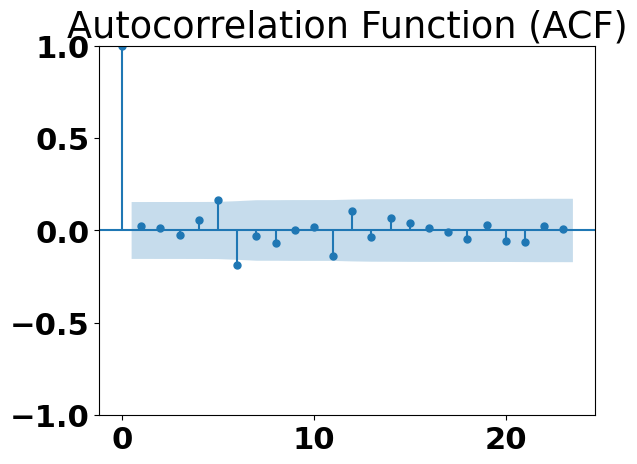

<Figure size 1200x600 with 0 Axes>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

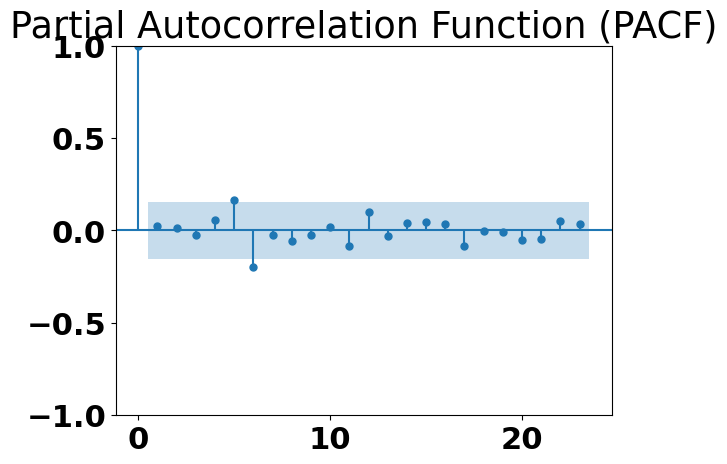

In [37]:
#ACF and PACF Analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_acf(filtered_df[roi_column])
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(filtered_df[roi_column])
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [38]:
#Model Fitting and Evaluation
import statsmodels.api as sm

# Specify p, d, and q based on your analysis
p = 1
d = 1
q = 1

model = sm.tsa.ARIMA(filtered_df[roi_column], order=(p, d, q))
results = model.fit()
print(results.summary())


c:\Users\User-ADMIN\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User-ADMIN\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User-ADMIN\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    ROI   No. Observations:                  162
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2166.759
Date:                Fri, 22 Sep 2023   AIC                           4339.518
Time:                        08:14:59   BIC                           4348.762
Sample:                             0   HQIC                          4343.272
                                - 162                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0405      0.099      0.410      0.682      -0.153       0.234
ma.L1         -0.9947      0.066    -14.963      0.000      -1.125      -0.864
sigma2      3.319e+10   2.63e-13   1.26e+23      0.0

# Step 6: Interpreting Results

## Model Information:

Dependent Variable (Dep. Variable): This is the variable you are trying to predict or model, which is 'ROI' in this case.

No. Observations: The number of data points used in the model, which is 162.

Model: The type of model used, which is ARIMA(1, 1, 1). This represents an AutoRegressive Integrated Moving Average model with orders (p=1, d=1, q=1).

Date: The date and time when the model was run.


## Summary Table:

The summary table provides coefficients for the ARIMA model.

ar.L1: The coefficient for the autoregressive (AR) lag 1 term. In your model, it's 0.0405.

ma.L1: The coefficient for the moving average (MA) lag 1 term. In your model, it's -0.9947.

sigma2: The estimated variance of the model's residuals, which is 3.319e+10.



AIC, BIC, and HQIC:

These are information criteria used for model comparison and selection.

AIC (Akaike Information Criterion): AIC is a measure of how well the model fits the data while penalizing complexity. Lower AIC values are preferred.

BIC (Bayesian Information Criterion): Similar to AIC but with a stronger penalty for model complexity. Lower BIC values are preferred.

HQIC (Hannan-Quinn Information Criterion): Another information criterion for model selection. Like AIC and BIC, lower values are preferred.

## Ljung-Box (L1) (Q) and Jarque-Bera (JB):

These are statistical tests and diagnostics to check the model's assumptions.

Ljung-Box (L1) (Q): A test for autocorrelation in the residuals. In your case, it's 0.00, which suggests that there is no significant autocorrelation in the residuals.

Jarque-Bera (JB): A test for the normality of the residuals. In your case, it's 13.48, with a low p-value (0.00), indicating that the residuals may not be normally distributed
## Heteroskedasticity (H):

This tests for heteroskedasticity, which is the presence of non-constant variance in the residuals. In your case, the result is 1.50, which is not extremely high.

## Skew and Kurtosis:

Skew measures the asymmetry of the residuals, and kurtosis measures the "tailedness" of the distribution. In your case, skew is 0.16, and kurtosis is 1.62.

## Interpretation:

The ARIMA(1, 1, 1) model has been fitted to the ROI data.

The coefficients for AR(1) and MA(1) are estimated as 0.0405 and -0.9947, respectively. These coefficients are relatively small, indicating that the influence of the previous value and the previous error on the current ROI is modest.

The estimated variance of the residuals is 3.319e+10.

The Ljung-Box test does not show significant autocorrelation in the residuals, suggesting that the model captures the temporal dependencies well.

The Jarque-Bera test indicates that the residuals may not be normally distributed, which could be an area for further investigation.

Overall, this ARIMA model has been fitted to your ROI data, and the results suggest that it captures the temporal dependencies to some extent

### RECOMMENDATIONS

Exploring different ARIMA orders (p, d, q) to see if a better-fitting model can be found.

Testing alternative time series models such as SARIMA or more complex models.

Investigating data transformations or detrending techniques to address potential non-stationarity or distributional issues in the data.

Conducting out-of-sample forecasting and evaluating the model's predictive performance on new data to assess its practical utility.
